In [237]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.metrics import r2_score
import matplotlib.patches as mpatches
import time
import datetime
import scipy.fftpack

In [3]:
df = pd.read_csv('Amazon.csv')

In [4]:
df


,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200
...,...,...,...,...,...,...,...
5837,2020-07-27,3062.000000,3098.000000,3015.770020,3055.209961,3055.209961,4170500
5838,2020-07-28,3054.270020,3077.090088,2995.760010,3000.330078,3000.330078,3126700
5839,2020-07-29,3030.989990,3039.159912,2996.770020,3033.530029,3033.530029,2974100
5840,2020-07-30,3014.000000,3092.000000,3005.000000,3051.879883,3051.879883,6128300


In [6]:
df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')

In [129]:
df1 = df[(df['Date']>datetime.datetime(2010,1,1)) & (df['Date']<datetime.datetime(2020,1,1))]

# Exploratory Data Analysis

In [130]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2516 entries, 3179 to 5694
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2516 non-null   datetime64[ns]
 1   Open       2516 non-null   float64       
 2   High       2516 non-null   float64       
 3   Low        2516 non-null   float64       
 4   Close      2516 non-null   float64       
 5   Adj Close  2516 non-null   float64       
 6   Volume     2516 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 157.2 KB


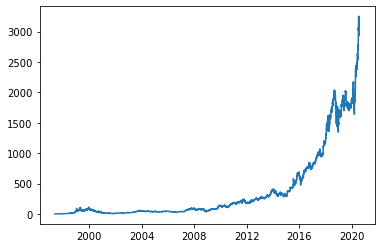

In [131]:
plt.plot(df['Date'], df['Open'])
plt.show()

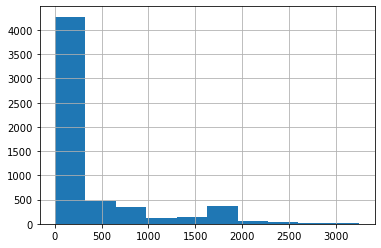

In [132]:
df['Open'].hist()

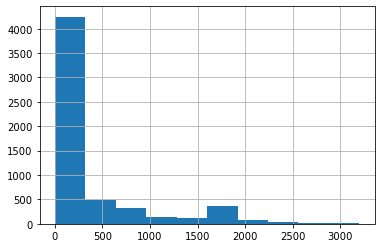

In [133]:
df['Close'].hist()

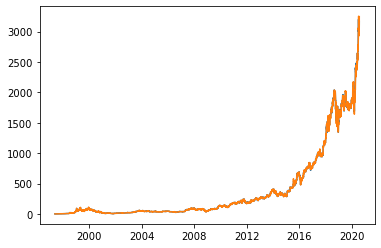

In [134]:
plt.plot(df['Date'], df['Close'])
plt.plot(df['Date'], df['Open'])
plt.show()

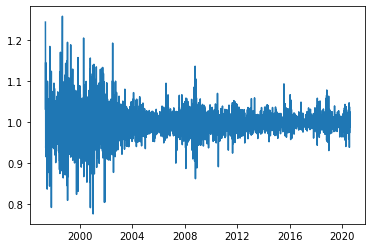

In [135]:
plt.plot(df['Date'], df['Open']/df['Close'])

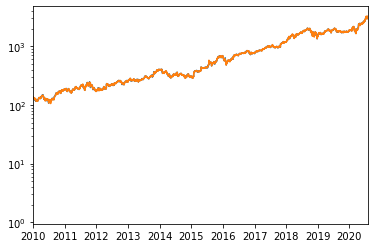

In [136]:
plt.plot(df['Date'], df['Close'])
plt.plot(df['Date'], df['Open'])
plt.xlim([datetime.datetime(2010,1,1),datetime.datetime(2020,7,31)])
plt.yscale('log')
plt.show()

In [137]:
df1.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2.516000e+03
mean,676.391252,682.786188,668.920656,676.207079,676.207079,4.529027e+06
std,580.910946,585.737518,574.697830,580.440707,580.440707,2.857670e+06
min,105.930000,111.290001,105.800003,108.610001,108.610001,8.813000e+05
25%,227.257496,230.859997,224.682507,227.597496,227.597496,2.782700e+06
50%,375.445007,379.154999,373.000000,375.140015,375.140015,3.797400e+06
75%,971.429993,976.155014,961.187485,967.847488,967.847488,5.322375e+06
max,2038.109985,2050.500000,2013.000000,2039.510010,2039.510010,4.242110e+07


In [138]:
df['Open'].isnull().values.any()

False

In [139]:
df.isnull().values.any()

False

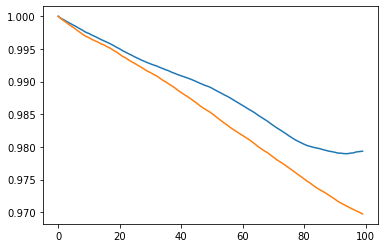

In [140]:
corrs = [ df['Open'].corr(df['Open'].shift(n)) for n in range(100)]
plt.plot(np.array(range(100)), corrs)
corrs2 = [ df1['Open'].corr(df1['Open'].shift(n)) for n in range(100)]
plt.plot(np.array(range(100)), corrs2)

In [141]:
# These are the "time lags"
shifts = np.arange(1, 100).astype(int)

In [142]:
shifted_data = {"lag_{}_day".format(day_shift): df1['Open'].shift(day_shift) for day_shift in shifts}

In [143]:
shifted_data

{'lag_1_day': 3179            NaN
 3180     136.250000
 3181     133.429993
 3182     134.600006
 3183     132.009995
            ...     
 5690    1788.260010
 5691    1793.810059
 5692    1801.010010
 5693    1882.920044
 5694    1874.000000
 Name: Open, Length: 2516, dtype: float64,
 'lag_2_day': 3179            NaN
 3180            NaN
 3181     136.250000
 3182     133.429993
 3183     134.600006
            ...     
 5690    1799.619995
 5691    1788.260010
 5692    1793.810059
 5693    1801.010010
 5694    1882.920044
 Name: Open, Length: 2516, dtype: float64,
 'lag_3_day': 3179            NaN
 3180            NaN
 3181            NaN
 3182     136.250000
 3183     133.429993
            ...     
 5690    1780.500000
 5691    1799.619995
 5692    1788.260010
 5693    1793.810059
 5694    1801.010010
 Name: Open, Length: 2516, dtype: float64,
 'lag_4_day': 3179            NaN
 3180            NaN
 3181            NaN
 3182            NaN
 3183     136.250000
            ...     


In [144]:
#create data frame
prices_perc_shifted = pd.DataFrame(shifted_data)


In [153]:
X

,lag_1_day,lag_2_day,lag_3_day,lag_4_day,lag_5_day,lag_6_day,lag_7_day,lag_8_day,lag_9_day,lag_10_day,...,lag_90_day,lag_91_day,lag_92_day,lag_93_day,lag_94_day,lag_95_day,lag_96_day,lag_97_day,lag_98_day,lag_99_day
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,136.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,133.429993,136.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,134.600006,133.429993,136.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,132.009995,134.600006,133.429993,136.250000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,1788.260010,1799.619995,1780.500000,1795.020020,1778.010010,1767.000000,1765.00000,1750.00000,1741.670044,1747.400024,...,1792.890015,1781.989990,1793.010010,1783.000000,1795.989990,1828.949951,1806.000000,1773.989990,1792.229980,1770.219971
2019-12-26,1793.810059,1788.260010,1799.619995,1780.500000,1795.020020,1778.010010,1767.00000,1765.00000,1750.000000,1741.670044,...,1818.079956,1792.890015,1781.989990,1793.010010,1783.000000,1795.989990,1828.949951,1806.000000,1773.989990,1792.229980
2019-12-27,1801.010010,1793.810059,1788.260010,1799.619995,1780.500000,1795.020020,1778.01001,1767.00000,1765.000000,1750.000000,...,1814.500000,1818.079956,1792.890015,1781.989990,1793.010010,1783.000000,1795.989990,1828.949951,1806.000000,1773.989990


In [194]:
df1.index = df1['Date']
prices_perc_shifted.index = df1['Date']
X = prices_perc_shifted[datetime.datetime(2010,1,1):].dropna()
y = df1['Open'][X.index]

In [154]:
X1 = X.dropna()

In [158]:
X1.index

DatetimeIndex(['2010-05-26', '2010-05-27', '2010-05-28', '2010-06-01',
               '2010-06-02', '2010-06-03', '2010-06-04', '2010-06-07',
               '2010-06-08', '2010-06-09',
               ...
               '2019-12-17', '2019-12-18', '2019-12-19', '2019-12-20',
               '2019-12-23', '2019-12-24', '2019-12-26', '2019-12-27',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', name='Date', length=2417, freq=None)

In [159]:
y

3179     136.250000
3180     133.429993
3181     134.600006
3182     132.009995
3183     130.559998
           ...     
5690    1793.810059
5691    1801.010010
5692    1882.920044
5693    1874.000000
5694    1842.000000
Name: Open, Length: 2516, dtype: float64

In [148]:
 from sklearn.linear_model import Ridge

In [162]:
model = Ridge()
model.fit(X, y)

Ridge()

In [163]:
model.coef_

array([ 9.21035631e-01,  9.69962272e-02,  1.25830622e-02, -4.34971131e-02,
        2.71968249e-02,  2.01588060e-03, -1.92952210e-02, -4.79089166e-02,
       -8.88778707e-02,  1.83361666e-01, -8.94865116e-02,  4.13764509e-02,
        4.62900051e-02, -1.15431330e-01,  1.37788442e-01, -3.81209666e-02,
        5.12846644e-02, -1.25149152e-01,  7.55028863e-02, -4.88334585e-02,
       -4.78208774e-02,  1.55948116e-01, -1.19766528e-01,  3.65106076e-02,
        1.10597843e-02, -1.34463790e-02, -8.97534482e-03,  9.63430935e-03,
       -5.82850033e-02,  6.83932740e-02,  2.01361484e-03,  5.10910694e-02,
       -2.78323123e-02, -9.24639391e-02,  7.56870513e-02, -2.17122018e-02,
        2.59043869e-03,  2.60739267e-02, -5.65290418e-02,  1.14002135e-02,
        2.35049867e-02,  5.72591309e-02, -4.62348284e-02,  6.08820550e-03,
       -1.90647076e-02, -1.47174109e-02, -6.85880726e-02,  9.76106122e-03,
        1.32987006e-01,  1.57089973e-02, -4.21424444e-02, -5.78496614e-02,
        5.13044585e-02, -

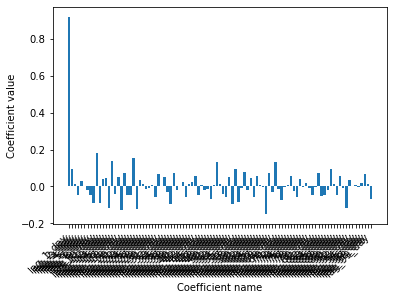

In [164]:
fig, ax = plt.subplots()
ax.bar(prices_perc_shifted2.columns, model.coef_)
ax.set(xlabel='Coefficient name', ylabel='Coefficient value')
# Set formatting so it looks nice
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()


In [196]:
df2 = df[df['Date']>datetime.datetime(2019,12,31)]
df2

,Date,Open,High,Low,Close,Adj Close,Volume
5695,2020-01-02,1875.000000,1898.010010,1864.150024,1898.010010,1898.010010,4029000
5696,2020-01-03,1864.500000,1886.199951,1864.500000,1874.969971,1874.969971,3764400
5697,2020-01-06,1860.000000,1903.689941,1860.000000,1902.880005,1902.880005,4061800
5698,2020-01-07,1904.500000,1913.890015,1892.040039,1906.859985,1906.859985,4044900
5699,2020-01-08,1898.040039,1911.000000,1886.439941,1891.969971,1891.969971,3508000
...,...,...,...,...,...,...,...
5837,2020-07-27,3062.000000,3098.000000,3015.770020,3055.209961,3055.209961,4170500
5838,2020-07-28,3054.270020,3077.090088,2995.760010,3000.330078,3000.330078,3126700
5839,2020-07-29,3030.989990,3039.159912,2996.770020,3033.530029,3033.530029,2974100
5840,2020-07-30,3014.000000,3092.000000,3005.000000,3051.879883,3051.879883,6128300


In [197]:
shifted_data2 = {"lag_{}_day".format(day_shift): df2['Open'].shift(day_shift) for day_shift in shifts}

In [198]:
shifted_data2

{'lag_1_day': 5695           NaN
 5696    1875.00000
 5697    1864.50000
 5698    1860.00000
 5699    1904.50000
            ...    
 5837    2930.00000
 5838    3062.00000
 5839    3054.27002
 5840    3030.98999
 5841    3014.00000
 Name: Open, Length: 147, dtype: float64,
 'lag_2_day': 5695           NaN
 5696           NaN
 5697    1875.00000
 5698    1864.50000
 5699    1860.00000
            ...    
 5837    3098.27002
 5838    2930.00000
 5839    3062.00000
 5840    3054.27002
 5841    3030.98999
 Name: Open, Length: 147, dtype: float64,
 'lag_3_day': 5695           NaN
 5696           NaN
 5697           NaN
 5698    1875.00000
 5699    1864.50000
            ...    
 5837    3125.00000
 5838    3098.27002
 5839    2930.00000
 5840    3062.00000
 5841    3054.27002
 Name: Open, Length: 147, dtype: float64,
 'lag_4_day': 5695           NaN
 5696           NaN
 5697           NaN
 5698           NaN
 5699    1875.00000
            ...    
 5837    3232.48999
 5838    3125.00000
 5

In [199]:
X_Test =pd.DataFrame(shifted_data2)
X_Test.index = df2['Date']

In [201]:
X_test1 = X_Test[datetime.datetime(2020,1,1):].dropna()


In [219]:
X_test1.index

DatetimeIndex(['2020-05-26', '2020-05-27', '2020-05-28', '2020-05-29',
               '2020-06-01', '2020-06-02', '2020-06-03', '2020-06-04',
               '2020-06-05', '2020-06-08', '2020-06-09', '2020-06-10',
               '2020-06-11', '2020-06-12', '2020-06-15', '2020-06-16',
               '2020-06-17', '2020-06-18', '2020-06-19', '2020-06-22',
               '2020-06-23', '2020-06-24', '2020-06-25', '2020-06-26',
               '2020-06-29', '2020-06-30', '2020-07-01', '2020-07-02',
               '2020-07-06', '2020-07-07', '2020-07-08', '2020-07-09',
               '2020-07-10', '2020-07-13', '2020-07-14', '2020-07-15',
               '2020-07-16', '2020-07-17', '2020-07-20', '2020-07-21',
               '2020-07-22', '2020-07-23', '2020-07-24', '2020-07-27',
               '2020-07-28', '2020-07-29', '2020-07-30', '2020-07-31'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [220]:
y_test= df2['Open'][X_test1.index]

In [203]:
df2.index = df2['Date']

In [205]:
y_test

Date
2020-01-02    1875.000000
2020-01-03    1864.500000
2020-01-06    1860.000000
2020-01-07    1904.500000
2020-01-08    1898.040039
                 ...     
2020-07-27    3062.000000
2020-07-28    3054.270020
2020-07-29    3030.989990
2020-07-30    3014.000000
2020-07-31    3244.000000
Name: Open, Length: 147, dtype: float64

In [ ]:
list(zip([0,1,2],['a','b','c']))

In [ ]:
a = model.coef_
for i in range(100):
    print("{prices_perc_shifted2}: {score}".format(prices_perc_shifted2=prices_perc_shifted2.columns[i], score=a[i]))

In [206]:
model.predict(X_test1)

array([2431.90936152, 2472.80503264, 2413.89033407, 2435.44710913,
       2390.0082568 , 2483.51499038, 2440.21879807, 2465.29053572,
       2475.36061297, 2403.01951806, 2570.32826681, 2539.00151703,
       2608.50364411, 2598.91906863, 2572.49500704, 2552.01262523,
       2646.98974644, 2635.3282943 , 2633.54052742, 2641.9021052 ,
       2694.50318854, 2774.8938802 , 2763.50435748, 2756.43990227,
       2767.69961437, 2684.37098928, 2698.82213719, 2709.94116097,
       2928.46348256, 2937.02276641, 3072.21218783, 3071.11104586,
       3093.63472111, 3213.99846017, 3232.16320897, 3101.97690026,
       3058.48415064, 2959.26651077, 2964.5972265 , 3013.0857022 ,
       3208.13520073, 3138.93246827, 3128.48399691, 2946.29534937,
       3074.16958514, 3049.85233439, 3038.01790023, 2996.84441048])

In [211]:
y_pred = pd.DataFrame({'y': model.predict(X_test1) })
y_pred.index = X_test1.index

In [212]:
y

Date
2010-05-26     125.050003
2010-05-27     124.980003
2010-05-28     126.070000
2010-06-01     124.970001
2010-06-02     124.019997
                 ...     
2019-12-24    1793.810059
2019-12-26    1801.010010
2019-12-27    1882.920044
2019-12-30    1874.000000
2019-12-31    1842.000000
Name: Open, Length: 2417, dtype: float64

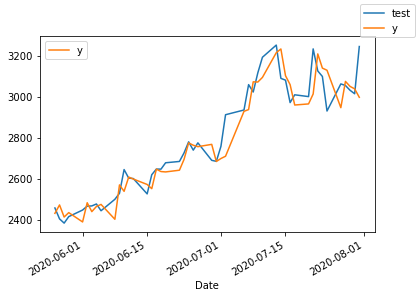

In [227]:
fig, ax = plt.subplots()
y_test.plot(ax=ax, label = "test")
y_pred.plot(ax=ax, label = "pred")
fig.legend()
plt.show()

In [233]:
r2_score(y_test,y_pred)

0.9012017500330365

In [224]:
y_test

Date
2020-05-26    2458.000000
2020-05-27    2404.989990
2020-05-28    2384.330078
2020-05-29    2415.939941
2020-06-01    2448.000000
2020-06-02    2467.000000
2020-06-03    2468.010010
2020-06-04    2477.429932
2020-06-05    2444.510010
2020-06-08    2500.199951
2020-06-09    2529.439941
2020-06-10    2645.000000
2020-06-11    2603.500000
2020-06-12    2601.209961
2020-06-15    2526.600098
2020-06-16    2620.000000
2020-06-17    2647.500000
2020-06-18    2647.010010
2020-06-19    2678.080078
2020-06-22    2684.500000
2020-06-23    2726.020020
2020-06-24    2780.000000
2020-06-25    2739.550049
2020-06-26    2775.060059
2020-06-29    2690.010010
2020-06-30    2685.070068
2020-07-01    2757.989990
2020-07-02    2912.010010
2020-07-06    2934.969971
2020-07-07    3058.550049
2020-07-08    3022.610107
2020-07-09    3115.989990
2020-07-10    3191.760010
2020-07-13    3251.060059
2020-07-14    3089.000000
2020-07-15    3080.229980
2020-07-16    2971.060059
2020-07-17    3009.000000
2020-07

# fourier transform

In [239]:
df['Open']

0          2.437500
1          1.968750
2          1.760417
3          1.729167
4          1.635417
           ...     
5837    3062.000000
5838    3054.270020
5839    3030.989990
5840    3014.000000
5841    3244.000000
Name: Open, Length: 5842, dtype: float64

In [241]:
df_interpolate = df.set_index('Date').resample('1D').mean().interpolate('linear')


No handles with labels found to put in legend.


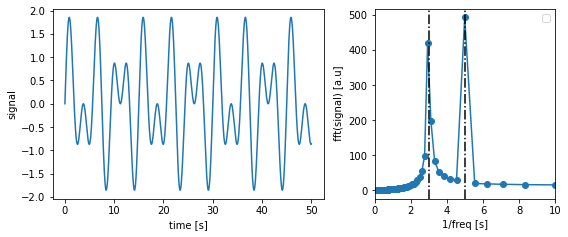

In [238]:
np.seterr(divide='ignore')

fig, axs = plt.subplots(1,2, gridspec_kw={'width_ratios': [1.5, 1]}, figsize = (8,2*1.7))

N = 1000
dt = 50/N

x = np.linspace(0,N*dt,N)
y = np.sin(2*np.pi*x/3) + 1*np.sin(2*np.pi*x/5)

axs[0].plot(x, y, label = "$\sin2\pi t/3+\sin2\pi t/5$")

axs[0].set_xlabel("time [s]")
axs[0].set_ylabel("signal")

yf = scipy.fftpack.fft(y)[:int(N/2)]
xf = np.linspace(0.0, 1/(2.0*dt), int(N/2))
axs[1].plot(1/xf, np.abs(yf))
axs[1].scatter(1/xf, np.abs(yf))

axs[1].set_xlim(0,10)
axs[1].set_xlabel("1/freq [s]")
axs[1].set_ylabel(" fft(signal) [a.u]")
axs[1].axvline(3, ls="-.", color="0")
axs[1].axvline(5, ls="-.", color="0")


plt.legend()

plt.tight_layout()
plt.show()

No handles with labels found to put in legend.


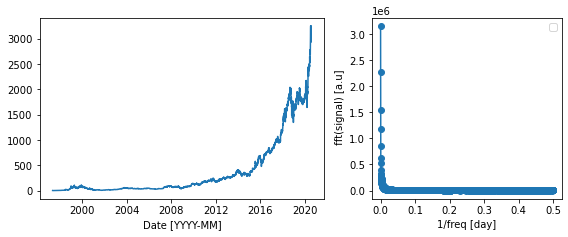

In [260]:
np.seterr(divide='ignore')

fig, axs = plt.subplots(1,2, gridspec_kw={'width_ratios': [1.5, 1]}, figsize = (8,2*1.7))

N = 1000
dt = 50/N

x = df_interpolate.index
y = df_interpolate['Open'].values

N = len(x)
dt = 1

axs[0].plot(x, y, label = "Amazon Stock Open")

axs[0].set_xlabel("Date [YYYY-MM]")

yf = scipy.fftpack.fft(y)[:int(N/2)]
xf = np.linspace(0.0, 1/(2.0*dt), int(N/2))
axs[1].plot(xf, np.abs(yf))
axs[1].scatter(xf, np.abs(yf))

# axs[1].set_xlim([0,50])
# axs[1].set_ylim([0,50000])
# axs[1].relim()
# axs[1].autoscale(axis='y')
axs[1].set_xlabel("1/freq [day]")
axs[1].set_ylabel(" fft(signal) [a.u]")
# axs[1].set_yscale('log')

plt.legend()

plt.tight_layout()
plt.show()